In [3]:
import pandas as pd
import pymongo

In [4]:
df = pd.read_csv('./datas/final2019(rev).csv', index_col=[0])
df.tail()

,Artist,Genre,Title,Year
4267,아이유,록/메탈,Blueming,2019
4268,MC몽,랩/힙합,"인기 (Feat. 송가인, 챈슬러)",2019
4269,ITZY (있지),댄스,ICY,2019
4270,Lil tachi,랩/힙합,눈 (Prod. 기리보이),2019
4271,홍진영,성인가요,오늘 밤에,2019


In [5]:
# 10년 단위로 Year 묶기
df['year_range'] = pd.cut(x=df['Year'], bins=[1963, 1969, 1974, 1979, 1984, 1989, 1994, 1999, 2004, 2009, 2014, 2019], labels=['1964-1969', '1970-1974', '1975-1979', '1980-1984', '1985-1989', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019'])
df.tail()

,Artist,Genre,Title,Year,year_range
4267,아이유,록/메탈,Blueming,2019,2015-2019
4268,MC몽,랩/힙합,"인기 (Feat. 송가인, 챈슬러)",2019,2015-2019
4269,ITZY (있지),댄스,ICY,2019,2015-2019
4270,Lil tachi,랩/힙합,눈 (Prod. 기리보이),2019,2015-2019
4271,홍진영,성인가요,오늘 밤에,2019,2015-2019


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import font_manager

f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

In [8]:
df.groupby('Genre').size().to_frame()

,0
Genre,
R&B/Soul,200
국내영화/국내드라마,123
그외,10
댄스,795
랩/힙합,290
록/메탈,373
발라드,1504
성인가요,623
인디음악,59


<Figure size 864x720 with 0 Axes>

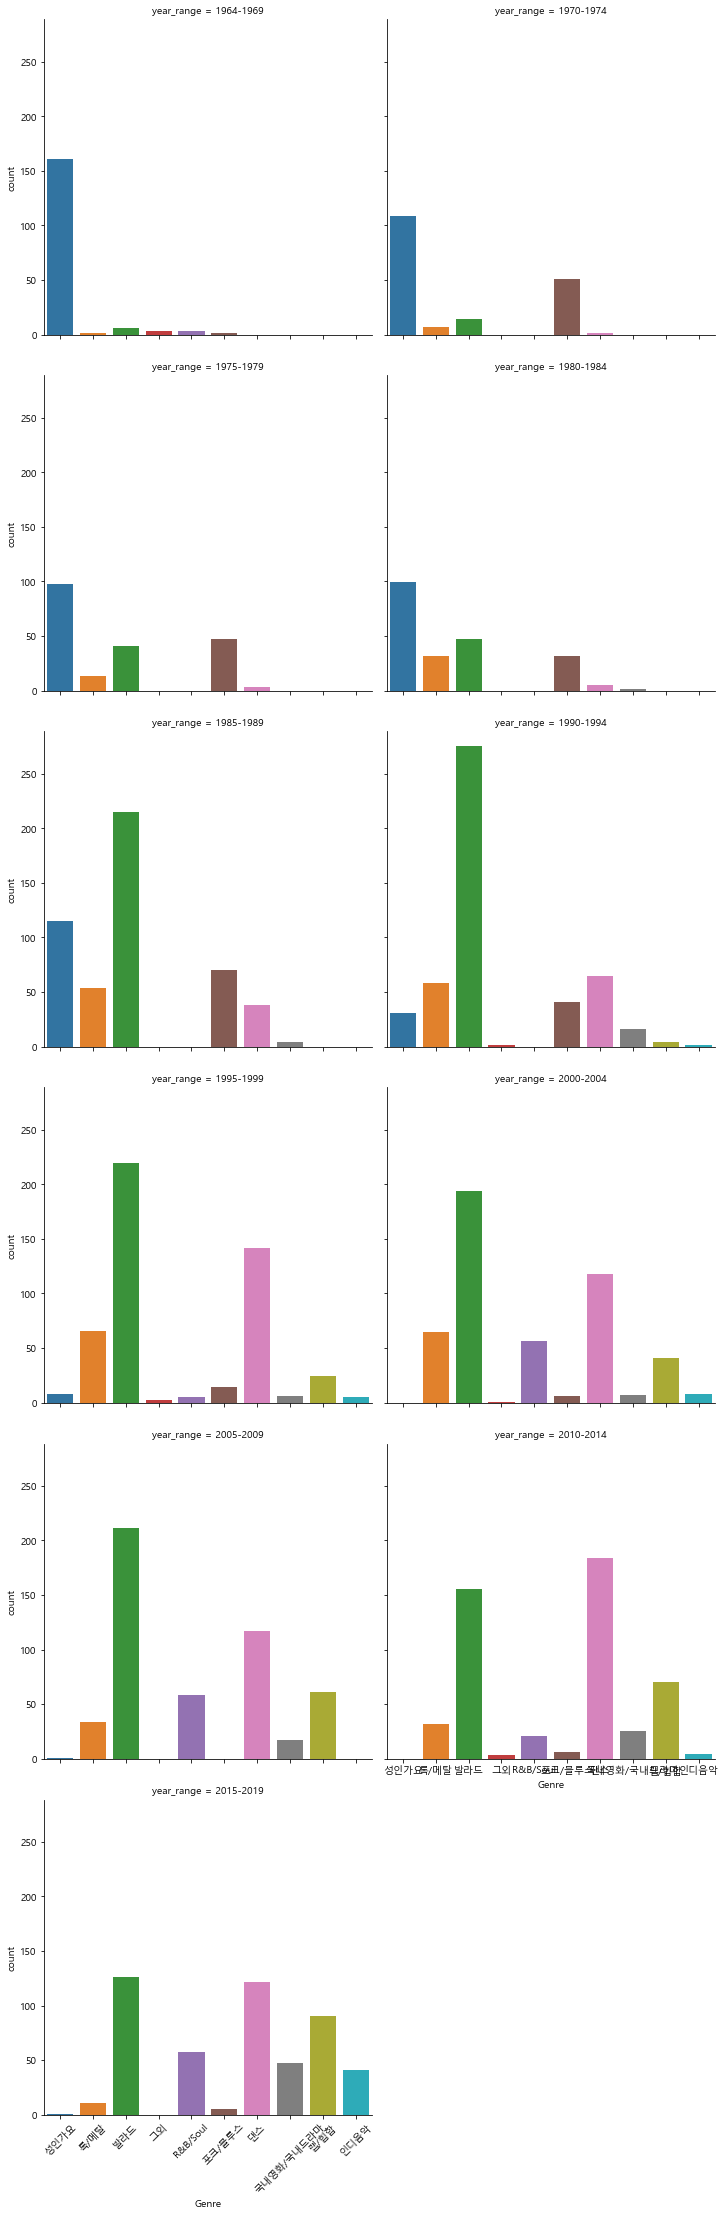

In [9]:
from matplotlib import font_manager

f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

plt.figure(figsize=(12,10))
sns.catplot(data=df, x='Genre', col='year_range', kind='count', col_wrap=2)
plt.xticks(fontsize=10, rotation=45);

### 1964~2019년 각 해의 TOP100 장르

### 총 장르

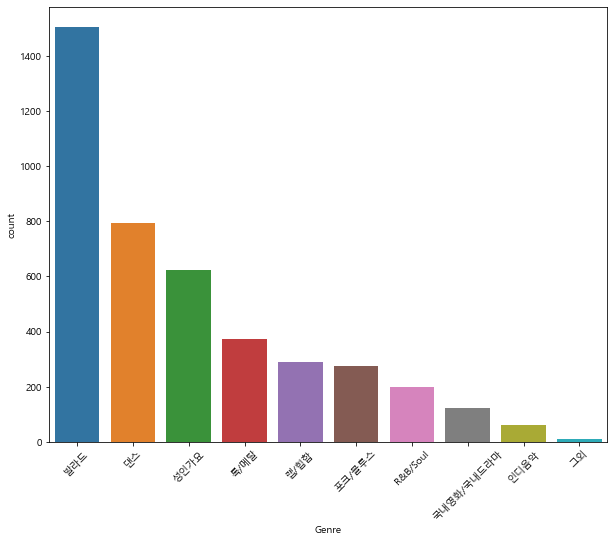

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='Genre', order = df['Genre'].value_counts().index)
plt.xticks(fontsize=10, rotation=45);

In [11]:
balad = df[df['Genre'] == '발라드'].set_index('year_range')
dance = df[df['Genre'] == '댄스'].set_index('year_range')
trot = df[df['Genre'] == '성인가요'].set_index('year_range')
rock = df[df['Genre'] == '록/메탈'].set_index('year_range')
rap = df[df['Genre'] == '랩/힙합'].set_index('year_range')
soul = df[df['Genre'] == 'R&B/Soul'].set_index('year_range')
folk = df[df['Genre'] == '포크/블루스'].set_index('year_range')
ost = df[df['Genre'] == '국내영화/국내드라마'].set_index('year_range')
indi = df[df['Genre'] == '인디음악'].set_index('year_range')
others = df[df['Genre'] == '그외'].set_index('year_range')

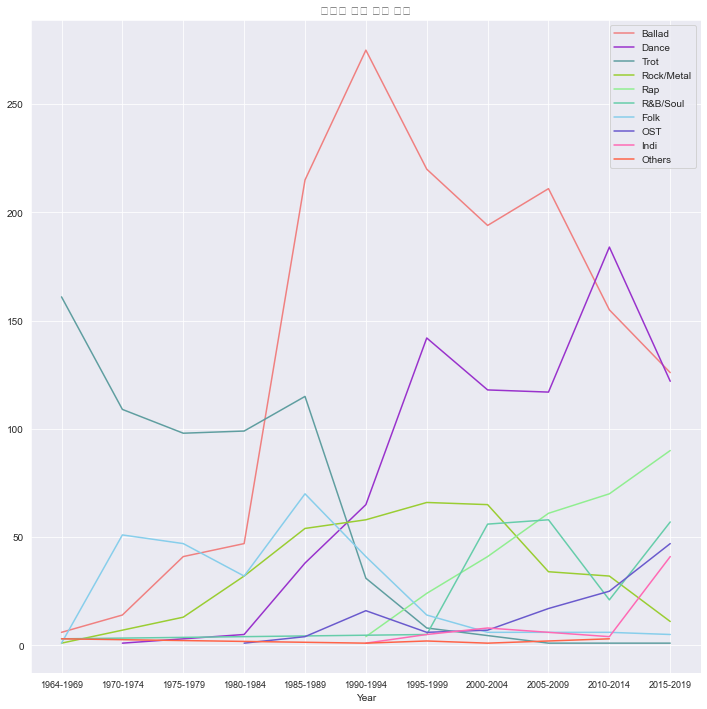

In [12]:
from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
plt.title('시대별 장르 인기 양상')
plt.xlabel('Year')
plt.plot(balad.groupby('year_range').size(), 'lightcoral', label='Ballad')
plt.plot(dance.groupby('year_range').size(), 'darkorchid', label='Dance')
plt.plot(trot.groupby('year_range').size(), 'cadetblue', label='Trot')
plt.plot(rock.groupby('year_range').size(), 'yellowgreen', label='Rock/Metal')
plt.plot(rap.groupby('year_range').size(), 'lightgreen', label='Rap')
plt.plot(soul.groupby('year_range').size(), 'mediumaquamarine', label='R&B/Soul')
plt.plot(folk.groupby('year_range').size(), 'skyblue', label='Folk')
plt.plot(ost.groupby('year_range').size(), 'slateblue', label='OST')
plt.plot(indi.groupby('year_range').size(), 'hotpink', label='Indi')
plt.plot(others.groupby('year_range').size(), 'tomato', label='Others')
plt.xticks(fontsize=9)
plt.legend(loc='best');

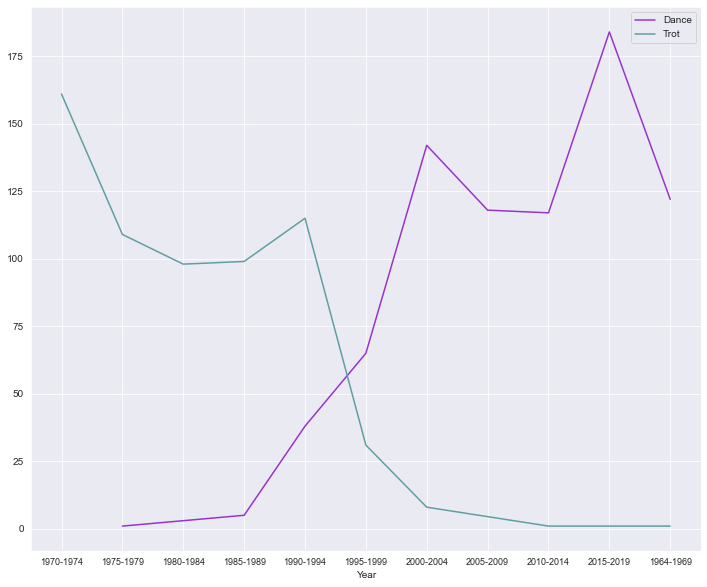

In [13]:
plt.figure(figsize=(12,10))
plt.xlabel('Year')
plt.plot(dance.groupby('year_range').size(), 'darkorchid', label='Dance')
plt.plot(trot.groupby('year_range').size(), 'cadetblue', label='Trot')
plt.xticks(fontsize=9)
plt.legend(loc='best');

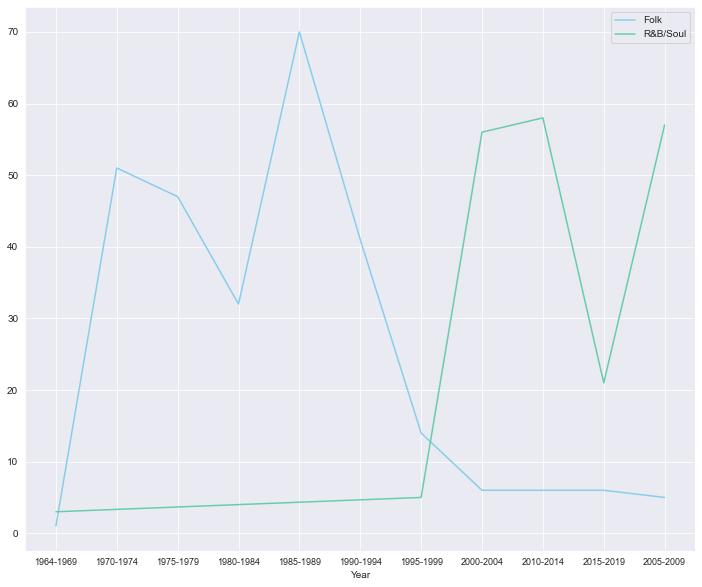

In [14]:
plt.figure(figsize=(12,10))
plt.xlabel('Year')
plt.plot(folk.groupby('year_range').size(), 'skyblue', label='Folk')
plt.plot(soul.groupby('year_range').size(), 'mediumaquamarine', label='R&B/Soul')
plt.xticks(fontsize=9)
plt.legend(loc='best');

In [16]:
balad = df[df['Genre'] == '발라드'].set_index('Year')
dance = df[df['Genre'] == '댄스'].set_index('Year')
trot = df[df['Genre'] == '성인가요'].set_index('Year')
rock = df[df['Genre'] == '록/메탈'].set_index('Year')
rap = df[df['Genre'] == '랩/힙합'].set_index('Year')
soul = df[df['Genre'] == 'R&B/Soul'].set_index('Year')
folk = df[df['Genre'] == '포크/블루스'].set_index('Year')
ost = df[df['Genre'] == '국내영화/국내드라마'].set_index('Year')
indi = df[df['Genre'] == '인디음악'].set_index('Year')
others = df[df['Genre'] == '그외'].set_index('Year')

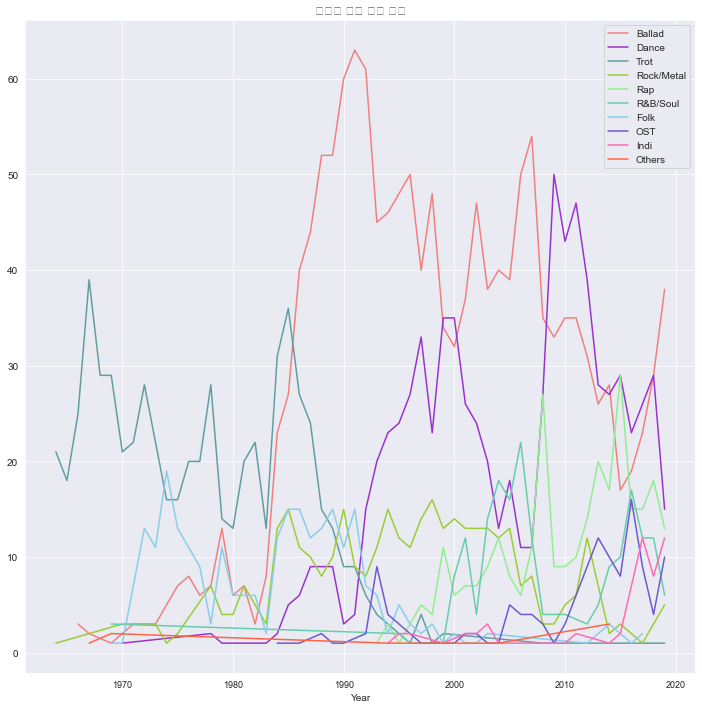

In [17]:
from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
plt.title('시대별 장르 인기 양상')
plt.xlabel('Year')
plt.plot(balad.groupby('Year').size(), 'lightcoral', label='Ballad')
plt.plot(dance.groupby('Year').size(), 'darkorchid', label='Dance')
plt.plot(trot.groupby('Year').size(), 'cadetblue', label='Trot')
plt.plot(rock.groupby('Year').size(), 'yellowgreen', label='Rock/Metal')
plt.plot(rap.groupby('Year').size(), 'lightgreen', label='Rap')
plt.plot(soul.groupby('Year').size(), 'mediumaquamarine', label='R&B/Soul')
plt.plot(folk.groupby('Year').size(), 'skyblue', label='Folk')
plt.plot(ost.groupby('Year').size(), 'slateblue', label='OST')
plt.plot(indi.groupby('Year').size(), 'hotpink', label='Indi')
plt.plot(others.groupby('Year').size(), 'tomato', label='Others')
plt.xticks(fontsize=9)
plt.legend(loc='best');

In [52]:
year_genre = df.groupby(['Year', 'Genre']).size().to_frame()
year_genre.reset_index(inplace=True)
year_genre.rename(columns={0:'count'}, inplace=True)
year_genre

,Year,Genre,count
0,1964,록/메탈,1
1,1964,성인가요,21
2,1965,성인가요,18
3,1966,발라드,3
4,1966,성인가요,25
...,...,...,...
316,2019,랩/힙합,13
317,2019,록/메탈,5
318,2019,발라드,38
319,2019,성인가요,1


In [56]:
year_max = year_genre.groupby('Year').max()
# year_max['max_total'] = year_genre.groupby('Year').max() / year_genre['count'].total()
year_max

,Genre,count
Year,,
1964,성인가요,21
1965,성인가요,18
1966,성인가요,25
1967,성인가요,39
1968,성인가요,29
1969,포크/블루스,29
1970,포크/블루스,21
1971,포크/블루스,22
1972,포크/블루스,28
